## Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('churn.csv')

In [2]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
# TotalCharges has a datatype of object instead of float

data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric, errors='coerce')

print(data['TotalCharges'])



0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


In [8]:
# make boolean columns into binary
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})


In [9]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
data['TotalCharges'].mean()

2283.3004408418656

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Analysis

In [12]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

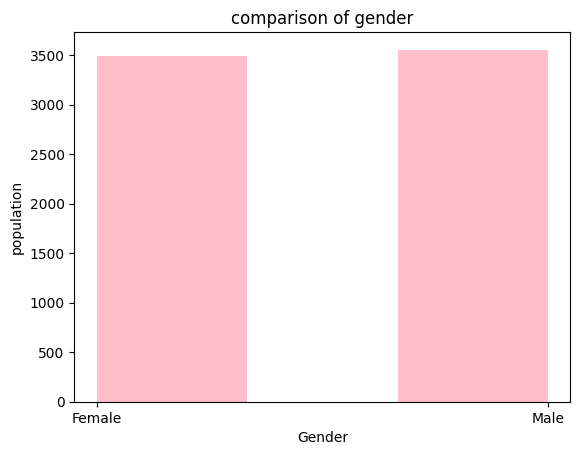

In [13]:
plt.hist(x = data.gender, bins = 3, color = 'pink')
plt.title('comparison of gender')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

In [14]:
data['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

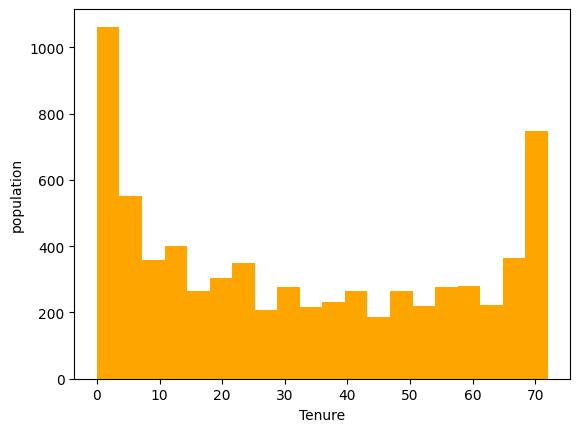

In [15]:
plt.hist(x = data.tenure, bins = 20, color = 'orange')
plt.xlabel("Tenure")
plt.ylabel('population')
plt.show()

In [16]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

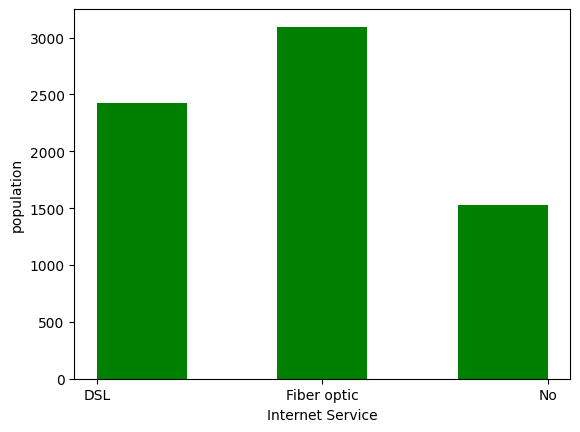

In [17]:
plt.hist(x = data.InternetService, bins = 5, color = 'green')
plt.xlabel("Internet Service")
plt.ylabel("population")
plt.show()

<AxesSubplot:xlabel='gender'>

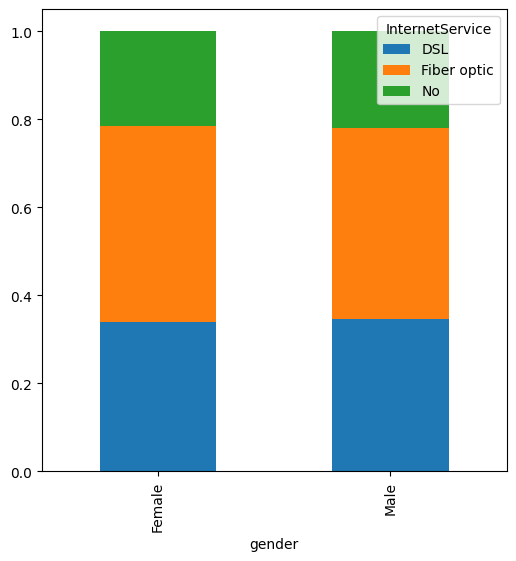

In [18]:
# compare gender to tenure
Gender = pd.crosstab(data['gender'], data['InternetService'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))

# Data Processing

In [19]:
data = data.drop(['customerID'], axis = 1)

print(data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [20]:
data.shape

(7043, 20)

In [21]:
# splitting data into x(independent) and y(dependent) variables

X = data.iloc[:,0:19]
y = data.iloc[:,19]

print(X.shape)
print(y.shape)

print(X.columns)
print(y)

(7043, 19)
(7043,)
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [22]:
# One Hot Endcoding (changing categories/strings into numbers)

X = pd.get_dummies(X)

X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,gender_Female,gender_Male,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,29.85,29.85,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,0,34,1,56.95,1889.50,0,1,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0,0,2,1,53.85,108.15,0,1,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0,0,45,0,42.30,1840.75,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,0,0,2,1,70.70,151.65,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [23]:
features = X.columns

In [24]:
# Imputation for the null values

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer = imputer.fit(data['TotalCharges'])
# data['TotalCharges'] = imputer.transform(data['TotalCharges'])

# data['TotalCharges'].fillna(data['TotalCharges'].mean())

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

In [25]:
X.shape

(7043, 42)

In [26]:
# splitting the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5634, 42)
(5634,)
(1409, 42)
(1409,)


In [27]:
# Feature scaling
# converts X variables into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-0.437749,-0.969579,1.532186,-0.465683,0.329573,-0.000474,-0.422099,1.025166,-1.025166,1.04801,...,1.250762,-1.099339,1.910109,-0.558353,1.200007,-1.200007,-0.530678,-0.527656,-0.709650,1.84247
1,-0.437749,-0.969579,-0.652662,0.885537,0.329573,1.074754,1.255366,1.025166,-1.025166,-0.95419,...,1.250762,-1.099339,-0.523530,1.790982,-0.833328,0.833328,1.884380,-0.527656,-0.709650,-0.54275
2,-0.437749,1.031376,-0.652662,-1.284605,-3.034225,-1.376499,-1.002985,-0.975452,0.975452,-0.95419,...,-0.799513,0.909638,-0.523530,-0.558353,-0.833328,0.833328,-0.530678,-0.527656,1.409146,-0.54275
3,-0.437749,-0.969579,-0.652662,-1.161766,0.329573,0.177346,-0.908113,-0.975452,0.975452,1.04801,...,-0.799513,0.909638,-0.523530,-0.558353,-0.833328,0.833328,-0.530678,-0.527656,1.409146,-0.54275
4,-0.437749,-0.969579,1.532186,-1.325551,0.329573,-0.098524,-0.003468,-0.975452,0.975452,-0.95419,...,-0.799513,-1.099339,-0.523530,1.790982,-0.833328,0.833328,1.884380,-0.527656,-0.709650,-0.54275


# Modelling

In [28]:
from sklearn.metrics import confusion_matrix

## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training accuracy: ", model.score(x_train, y_train))
print("Testing accuracy: ", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy:  0.9985800496982605
Testing accuracy:  0.7083037615330021
[[839 197]
 [214 159]]


In [30]:
# tree.plot_tree(model, feature_names=features)

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training accuracy: ", model.score(x_train, y_train))
print("Testing accuracy: ", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy:  0.9985800496982605
Testing accuracy:  0.794180269694819
[[960  76]
 [214 159]]


# Finding Important Features

In [33]:
feature_imp = pd.Series(model.feature_importances_,index=features).sort_values(ascending=False)
feature_imp


TotalCharges                               0.168146
tenure                                     0.149770
MonthlyCharges                             0.144595
Contract_Month-to-month                    0.053968
PaymentMethod_Electronic check             0.029484
TechSupport_No                             0.027522
OnlineSecurity_No                          0.026349
InternetService_Fiber optic                0.024083
Partner                                    0.023367
SeniorCitizen                              0.019573
Dependents                                 0.019528
gender_Female                              0.018339
gender_Male                                0.017843
OnlineBackup_No                            0.016337
PaperlessBilling_Yes                       0.015457
Contract_Two year                          0.014925
PaperlessBilling_No                        0.014697
DeviceProtection_No                        0.014488
MultipleLines_No                           0.013371
MultipleLine

In [34]:
vars_to_drop = list()
for i, v in feature_imp.items():
    if v < 0.01:
        vars_to_drop.append(i)
        
vars_to_drop

['Contract_One year',
 'InternetService_DSL',
 'OnlineBackup_No internet service',
 'PhoneService',
 'MultipleLines_No phone service',
 'TechSupport_No internet service',
 'StreamingMovies_No internet service',
 'DeviceProtection_No internet service',
 'StreamingTV_No internet service',
 'OnlineSecurity_No internet service',
 'InternetService_No']

## Reprocess data

In [35]:
x2 = data.iloc[:,0:19]
y2 = data.iloc[:,19]

x2 = pd.get_dummies(x2)
x2 = x2.drop(vars_to_drop, axis = 1)
x2features = x2.columns
x2

,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,MultipleLines_No,MultipleLines_Yes,...,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,29.85,29.85,1,0,0,0,...,1,0,1,0,0,1,0,0,1,0
1,0,0,0,34,56.95,1889.50,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,53.85,108.15,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
3,0,0,0,45,42.30,1840.75,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,70.70,151.65,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,84.80,1990.50,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
7039,0,1,1,72,103.20,7362.90,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
7040,0,1,1,11,29.60,346.45,1,0,0,0,...,1,0,1,0,0,1,0,0,1,0
7041,1,1,0,4,74.40,306.60,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1


In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(x2)
x2imputed = imputer.transform(x2)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x2imputed, y2, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5634, 31)
(5634,)
(1409, 31)
(1409,)


In [38]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.437749,-0.969579,1.532186,-0.465683,-0.000474,-0.422099,1.025166,-1.025166,1.04801,-0.860523,...,-0.807289,1.250762,-1.099339,-0.558353,1.200007,-1.200007,-0.530678,-0.527656,-0.709650,1.84247
1,-0.437749,-0.969579,-0.652662,0.885537,1.074754,1.255366,1.025166,-1.025166,-0.95419,1.162083,...,-0.807289,1.250762,-1.099339,1.790982,-0.833328,0.833328,1.884380,-0.527656,-0.709650,-0.54275
2,-0.437749,1.031376,-0.652662,-1.284605,-1.376499,-1.002985,-0.975452,0.975452,-0.95419,-0.860523,...,1.238714,-0.799513,0.909638,-0.558353,-0.833328,0.833328,-0.530678,-0.527656,1.409146,-0.54275
3,-0.437749,-0.969579,-0.652662,-1.161766,0.177346,-0.908113,-0.975452,0.975452,1.04801,-0.860523,...,1.238714,-0.799513,0.909638,-0.558353,-0.833328,0.833328,-0.530678,-0.527656,1.409146,-0.54275
4,-0.437749,-0.969579,1.532186,-1.325551,-0.098524,-0.003468,-0.975452,0.975452,-0.95419,1.162083,...,1.238714,-0.799513,-1.099339,1.790982,-0.833328,0.833328,1.884380,-0.527656,-0.709650,-0.54275


# Remodel Random Forest

In [39]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training accuracy: ", model.score(x_train, y_train))
print("Testing accuracy: ", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy:  0.9985800496982605
Testing accuracy:  0.7892122072391767
[[949  87]
 [210 163]]


In [44]:
model.predict_proba(x_test)

array([[0.53, 0.47],
       [0.94, 0.06],
       [1.  , 0.  ],
       ...,
       [0.89, 0.11],
       [0.99, 0.01],
       [0.5 , 0.5 ]])

In [42]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = x2features, 
               class_names=y2.name,
               filled = True);
fig.savefig('rf_individualtree.png')